In [1]:
import numpy as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
import pandas as pd 

In [2]:
dataset = pd.read_csv("MSFT.csv")
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062970,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.065219,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.066344,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064657,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063533,47894400


In [3]:
dataset.drop(columns=['Adj Close'], inplace=True)

In [4]:
dataset.head(5)

,Date,Open,High,Low,Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400


In [5]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
dataset.shape

(8416, 6)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8416 non-null   object 
 1   Open    8416 non-null   float64
 2   High    8416 non-null   float64
 3   Low     8416 non-null   float64
 4   Close   8416 non-null   float64
 5   Volume  8416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 394.6+ KB


<Axes: >

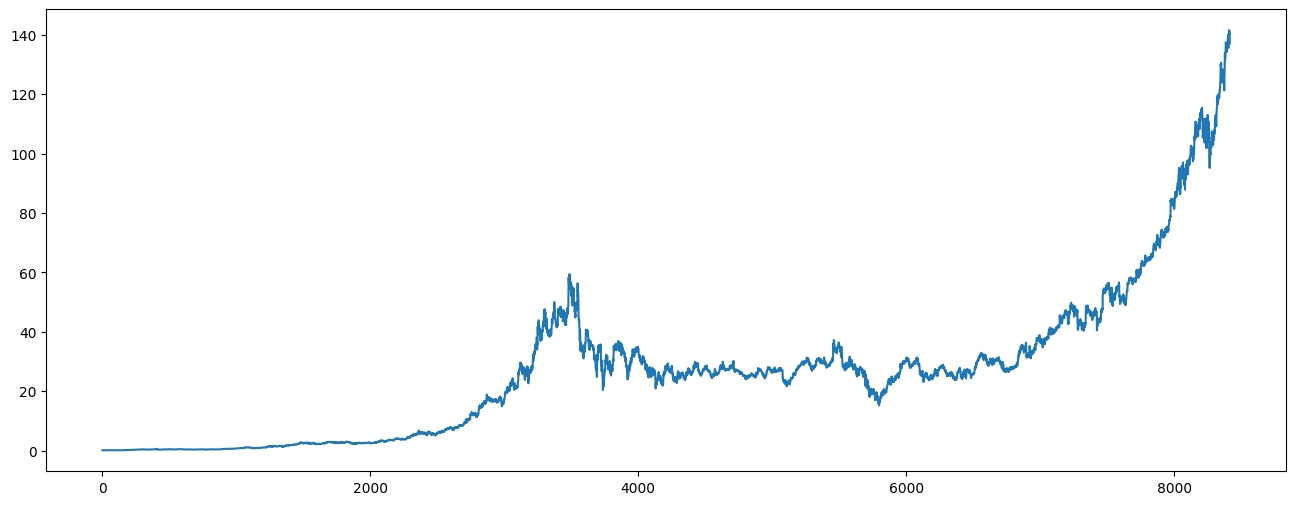

In [8]:
dataset['Open'].plot(figsize=(16,6))

In [9]:
# Convert all columns to float where possible
dataset = dataset.astype(float, errors='ignore')

In [10]:
dataset.head(5)

,Date,Open,High,Low,Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1.031789e+09
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,3.081600e+08
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,1.331712e+08
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,6.776640e+07
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,4.789440e+07


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8416 non-null   object 
 1   Open    8416 non-null   float64
 2   High    8416 non-null   float64
 3   Low     8416 non-null   float64
 4   Close   8416 non-null   float64
 5   Volume  8416 non-null   float64
dtypes: float64(5), object(1)
memory usage: 394.6+ KB


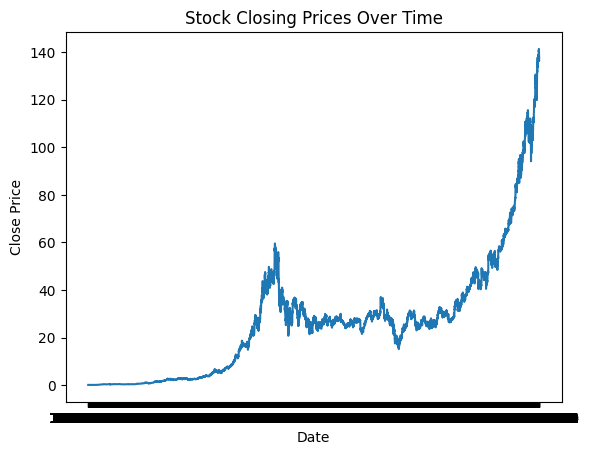

In [13]:
# Plot Close prices
plt.plot(dataset['Date'], dataset['Close'])
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [16]:
dataset['Date'] = pd.to_datetime(dataset['Date'])


In [18]:
dataset = dataset.drop(columns=['Date'])

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8416 non-null   float64
 1   High    8416 non-null   float64
 2   Low     8416 non-null   float64
 3   Close   8416 non-null   float64
 4   Volume  8416 non-null   float64
dtypes: float64(5)
memory usage: 328.9 KB


In [20]:
#Prepare Data for Training
#Define Features and Target:
#For Regression: Use Close price as the target.
#For Classification: Create a binary target (e.g., 1 if Close increases, 0 otherwise).

In [22]:
# Regression target
X = dataset.drop(columns=['Close'])
y = dataset['Close']

# Classification target
dataset['Target'] = (dataset['Close'] > dataset['Close'].shift(1)).astype(int)
X = dataset.drop(columns=['Close', 'Target'])
y = dataset['Target']


In [23]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#(a) Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [38]:
# For Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
model_rf.score(X_train, y_train)*100      ,model_rf.score(X_test,y_test)*100

(87.61019228080433, 9.348567702930987)

In [55]:
# For Classification
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
model_rf.score(X_train, y_train)*100      ,model_rf.score(X_test,y_test)*100

(100.0, 63.77672209026129)

In [41]:
#(b) Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVR, SVC

In [45]:
# For Regression
model_svm = SVR(kernel='rbf')
model_svm.fit(X_train, y_train)

SVR()

In [46]:
model_svm.score(X_train, y_train)*100      ,model_svm.score(X_test,y_test)*100

(-46.73092832207735, -51.486991531376994)

In [47]:
# For Classification
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

SVC()

In [48]:
model_svm.score(X_train, y_train)*100      ,model_svm.score(X_test,y_test)*100

(50.65359477124183, 48.69358669833729)

In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
model_voting = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
], voting='soft')
model_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [59]:
model_voting.score(X_train, y_train)*100      ,model_voting.score(X_test,y_test)*100

(100.0, 63.83610451306413)